In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
import utils as ut

In [33]:
df = pd.read_csv("./data/creditcard.csv")
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Проверим на пропуски


<Axes: >

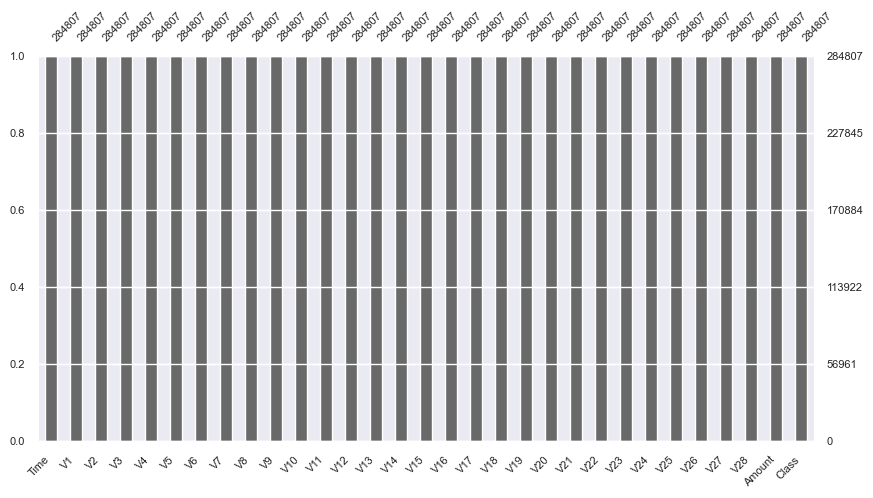

In [35]:
msno.bar(df, figsize=(10, 5), fontsize=8)

## Статистические показатели столбцов

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Коротко о данных:
- Для данных был пременен PCA метод (было сказано на kaggle) -> непонятно что за данные мы вообще имеем.
- К Amount можно применить стандартизацию, чтобы она лежала примерно в тех же значениях, что и остальные данные.

## Балансировка датасета

Честные 99.83 % of the dataset
Мошеннические: 0.17 % of the dataset


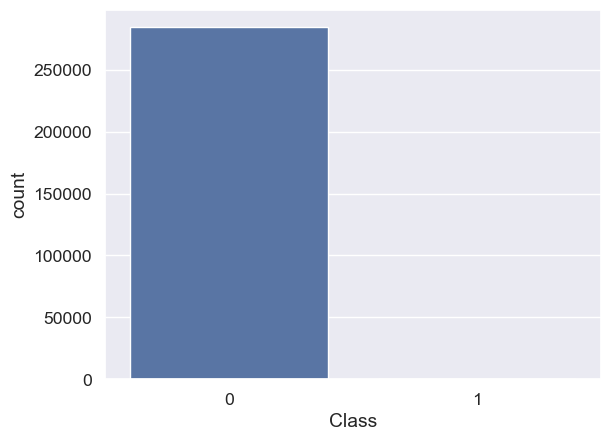

In [37]:
# Посмотрим, какой процент мошенничества в датасете
print('Честные', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Мошеннические:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

sns.countplot(df, x='Class')
plt.show()

## Исследуем взаимосвязь признаков

C:\Users\S\anaconda3\envs\ds_en\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


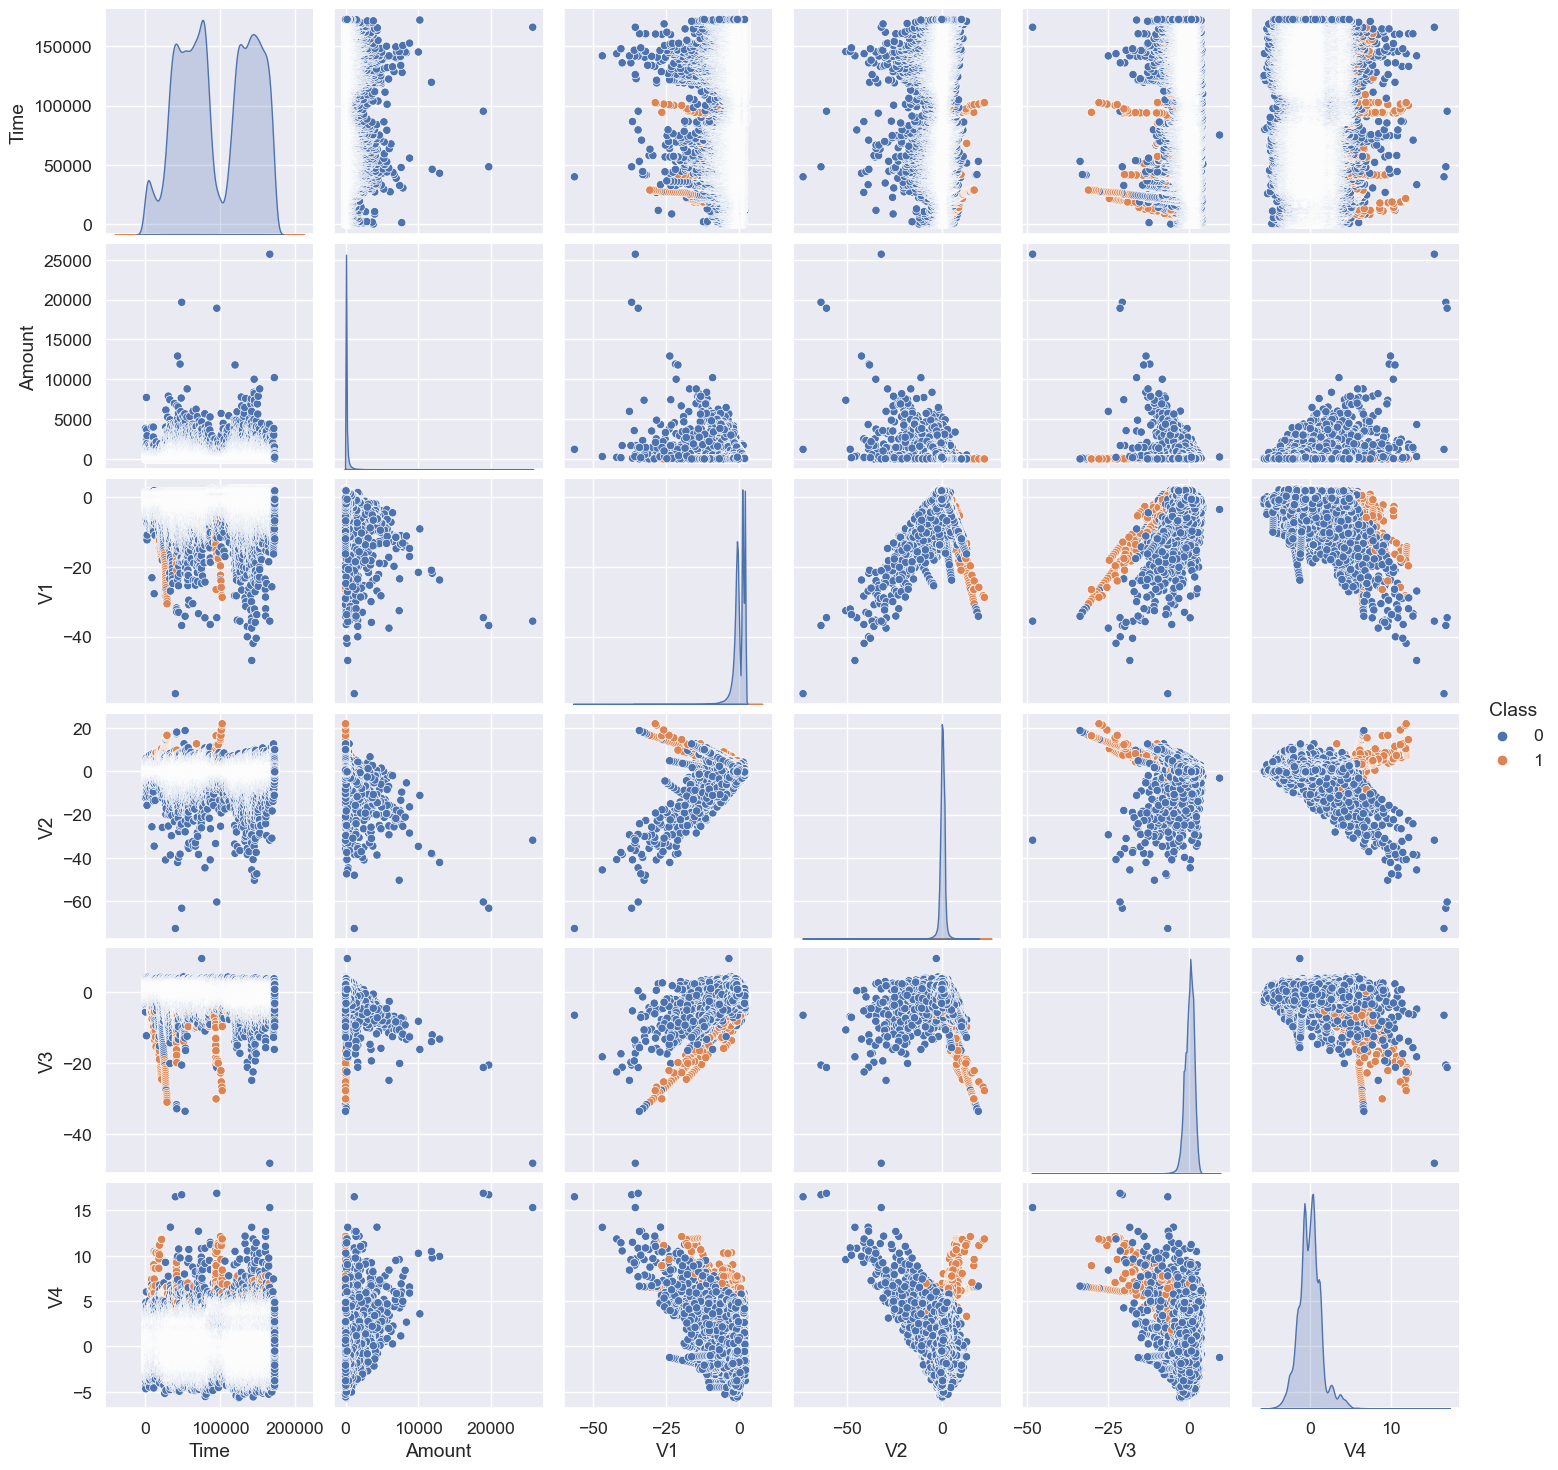

In [38]:
cols = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'Class']
sns_plot = sns.pairplot(df[cols], hue='Class')

Взаимосвязь во многих случаях нелинейная, т.е лучше попробовать использовать нелинейный модели. Однако во многих случая классы могут быть разделены.

<Axes: >

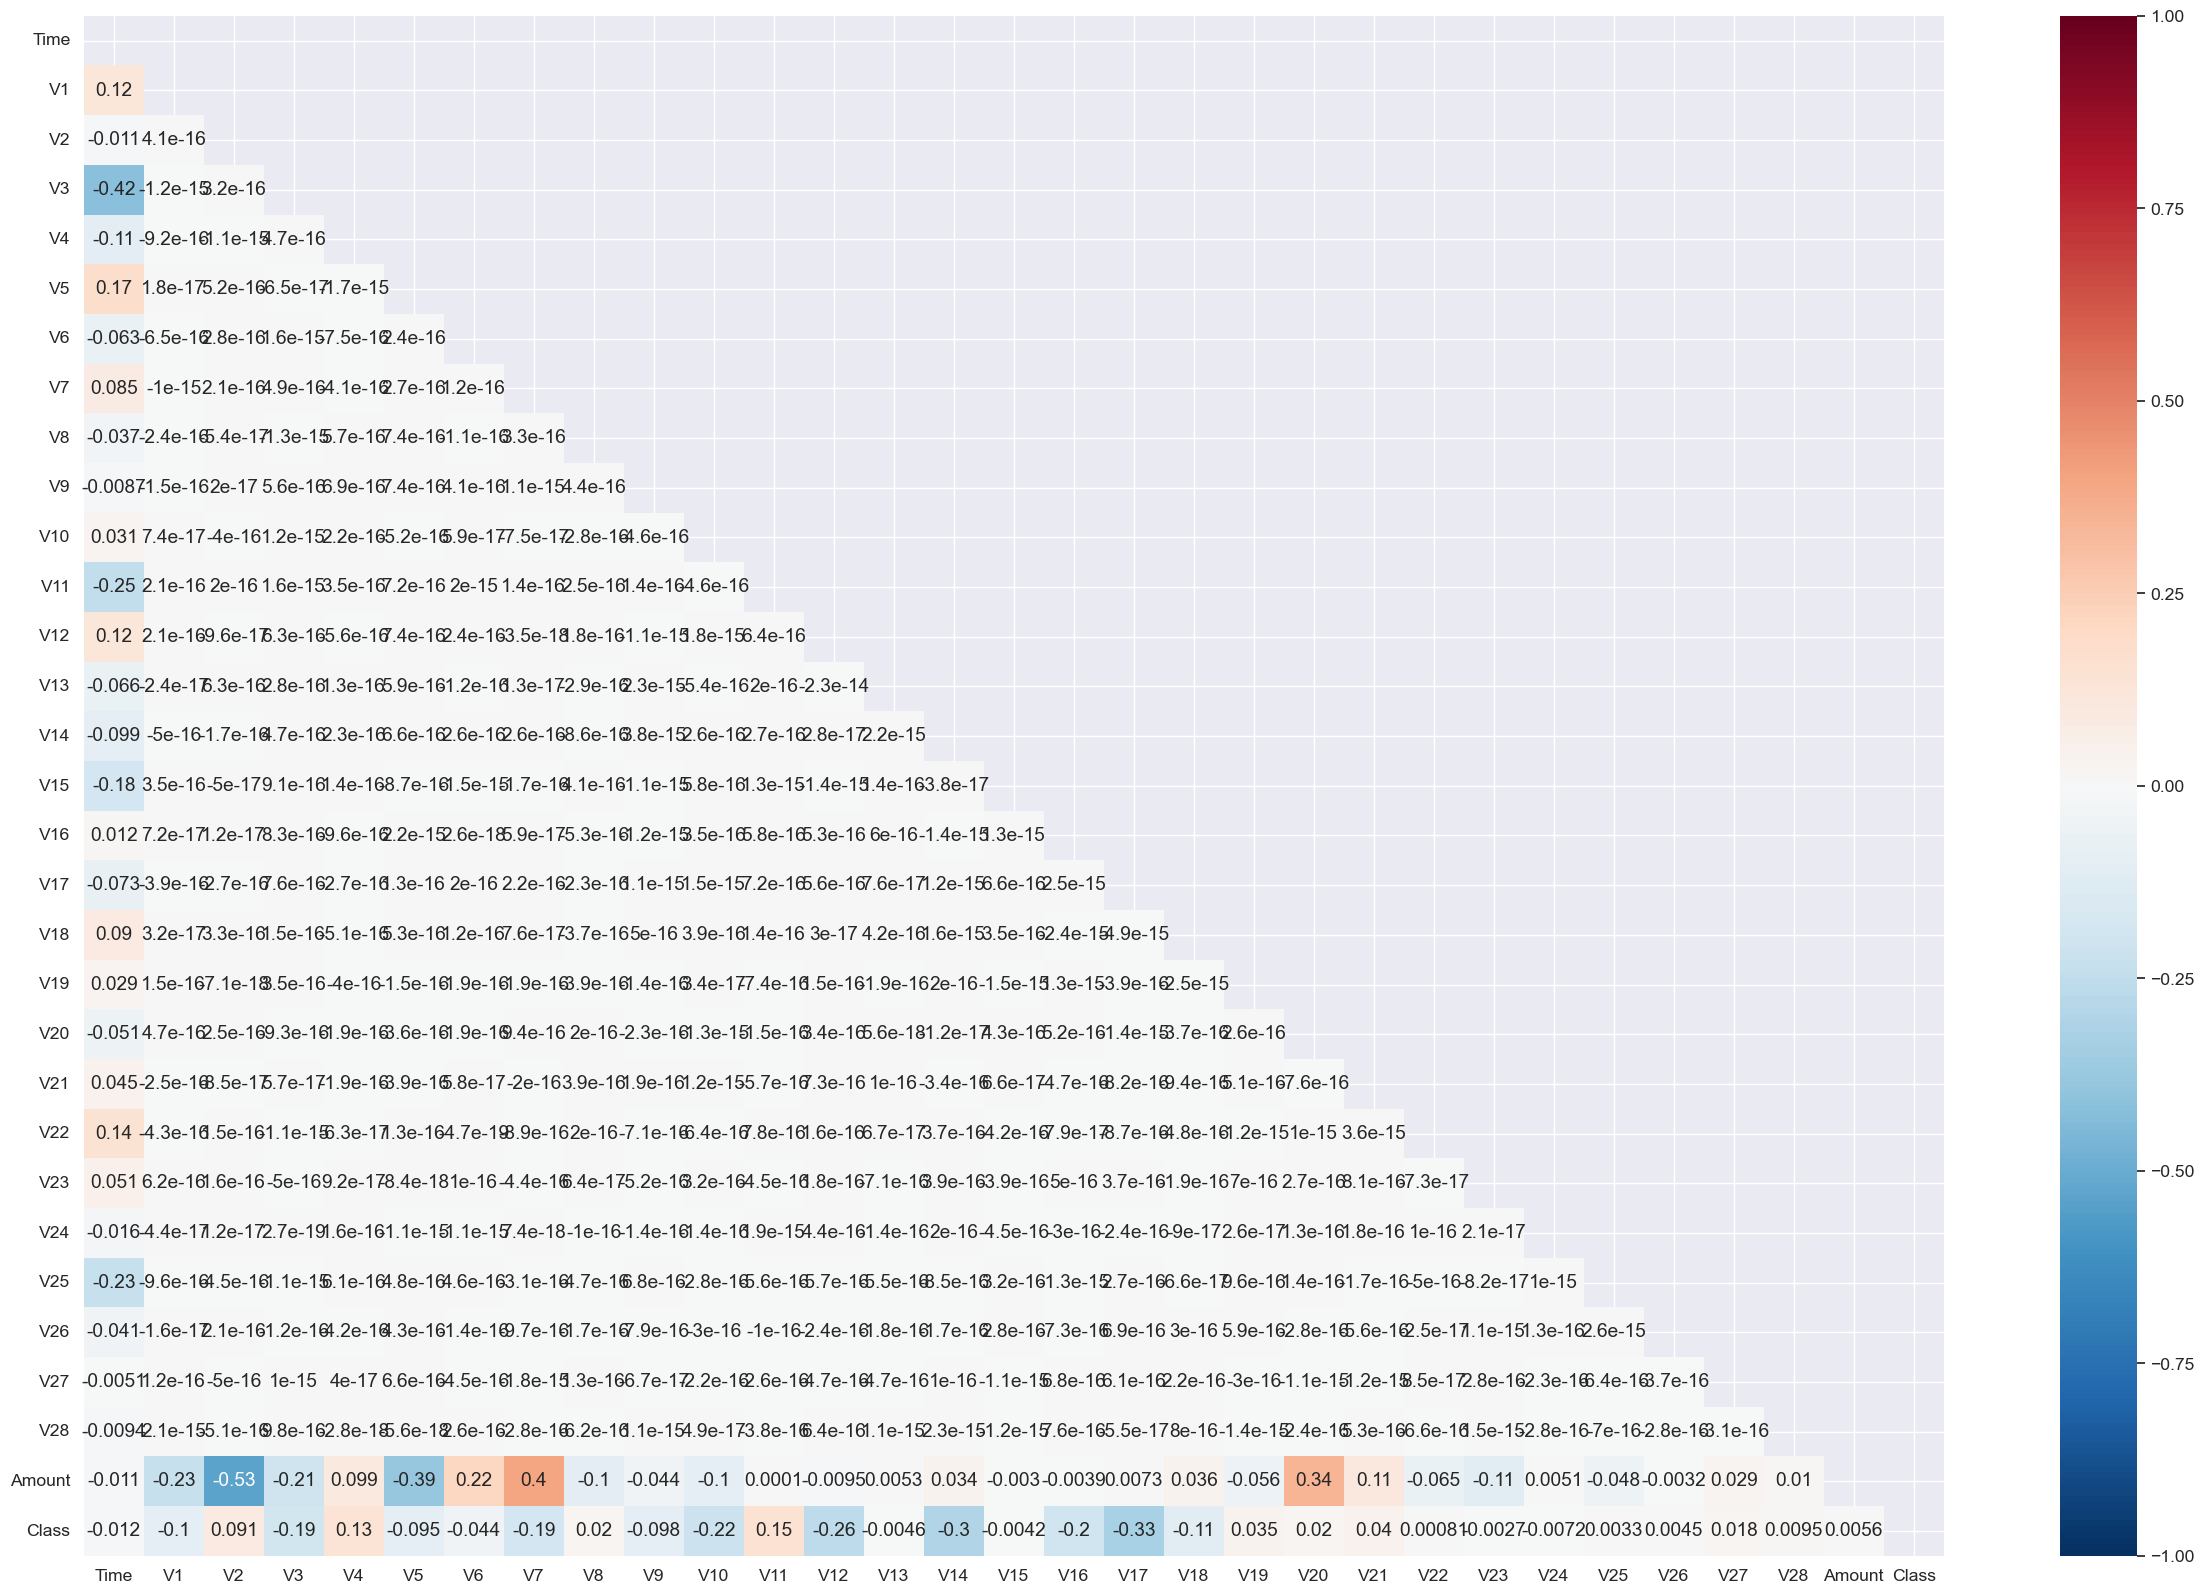

In [39]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.15)
sns.heatmap(df.corr(),
            cmap='RdBu_r', # задаёт цветовую схему
            annot=True, # рисует значения внутри ячеек
            vmin=-1, vmax=1,
            mask=np.triu(df.corr()))


**Как видно, в исходном датасете плохо коррелируют друг с другом.**

**Тем не менее, Time и Amount неплохо коррелирует  с другими признаками.**

**Так же видно, что признаки с V1 - V18 почти все имеют связь с целевой переменной**

Я немного изменил последовательность исследований. Предполагаю, что высокая корреляция между признаками была вызвана тем, что я сначла

балансировал датасет, только после чего проводил исследования. Нужно наоборот.

Тем не менее, **я отвечу на вопрос "Многие признаки коррелируют друг с другом - должны ли что-то сделать с этим?"**

1) Насколько я знаю, сильная корреляция (близко к +- 1) между двумя или несколькими признаками может вызывать мультиколлинеарность. Это может ухудшить работу особенно линейных моделей.
2) Так же сильная корреляция может значить, что два признака похожи друг на друга очень. Т.е несут +- одну и ту же информацию.

**Способы решения данных проблем - это:**
1) удалить один/несколько таких признаков.
2) После обучения модели с сильно коррелированными признаками сделать отбор по их важности для модели (вывести feature_importance_)
3) Ну или как-то их преобразовать. Тот же Min Max Scaler, Normalizer итд.

## Стандартизация Amount

In [40]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


<Axes: xlabel='Class', ylabel='count'>

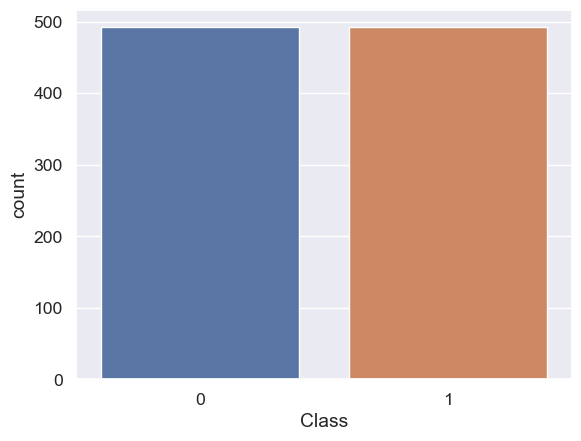

In [41]:
df_full = df.copy()
df = ut.balance_the_dataset(df, 'Class')
sns.countplot(df, x='Class' )

In [42]:
y = df['Class']
X = df.drop(columns='Class')


In [43]:
X.drop(columns="Time", inplace=True)  # Удалим время
X.drop(columns='Amount', inplace=True)  # Удалим Amount
# (было выяснено эмпирически, что так наилучший score)

## Разделим датасет на тренировочную и тестовую выборки

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Посмотрим на тестовые и тренировочные данные

Text(0.5, 1.0, 'y_test')

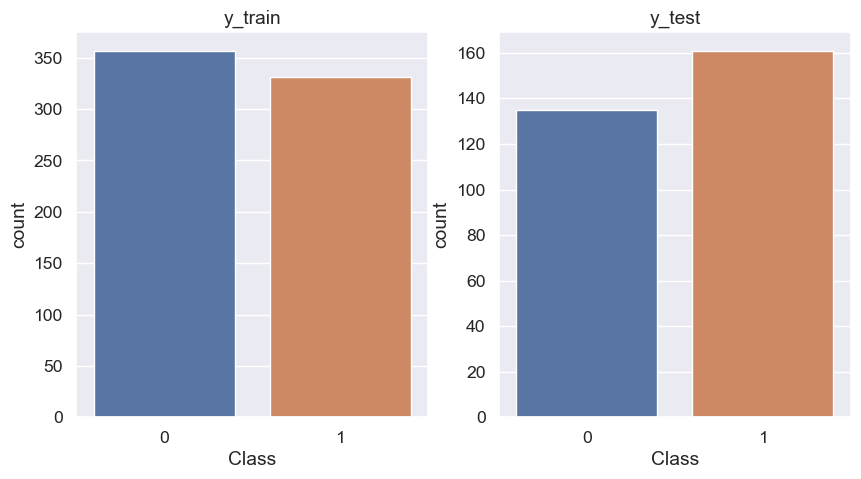

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(pd.DataFrame(y_train), x='Class', ax=ax[0])
sns.countplot(pd.DataFrame(y_test), x='Class', ax=ax[1])
ax[0].set_title('y_train')
ax[1].set_title('y_test')


In [46]:
X_train.describe().loc[['mean', 'std', 'min', 'max']]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,-2.310774,1.782446,-3.240192,2.125249,-1.405373,-0.609882,-2.537082,0.238391,-1.200175,-2.581998,...,0.300458,0.149207,0.341686,0.001160,-0.036552,-0.049227,0.054613,0.026973,0.081263,0.030751
std,5.419241,3.592990,6.042686,3.083752,4.207001,1.793387,5.767722,4.857134,2.270462,4.296112,...,1.262750,1.084944,2.675945,1.150979,1.286600,0.563090,0.689509,0.492889,0.951563,0.433217
min,-30.552380,-10.602409,-31.103685,-3.269805,-22.105532,-5.773192,-43.557242,-41.044261,-13.434066,-24.588262,...,-3.681904,-3.920390,-22.797604,-8.887017,-19.254328,-1.929717,-4.781606,-1.343536,-7.263482,-3.006067
max,2.345023,22.057729,3.043405,11.906170,11.095089,6.474115,8.633255,20.007208,6.953391,7.176214,...,4.851255,11.059004,27.202839,8.361985,5.466230,1.081131,2.208209,2.745261,3.052358,1.779364


In [47]:
X_test.describe().loc[['mean', 'std', 'min', 'max']]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,-2.862063,2.164592,-4.058515,2.593343,-1.922455,-0.731914,-3.258928,0.343646,-1.504310,-3.453146,...,0.448682,0.158764,0.452051,0.008757,0.037793,-0.064271,0.019355,-0.013097,0.051231,0.040829
std,5.651811,3.727742,6.661965,3.358132,4.273380,1.813190,6.142631,5.023610,2.395379,4.991095,...,1.234889,1.126355,3.108806,1.233912,0.795601,0.543311,0.610487,0.435609,1.190759,0.502457
min,-29.200329,-7.449015,-30.177317,-3.393556,-21.225810,-6.406267,-31.197329,-37.353443,-9.462573,-22.187089,...,-2.721853,-6.003578,-8.755698,-8.887017,-4.129195,-2.028024,-2.167510,-1.149923,-7.263482,-1.796363
max,2.209722,16.497472,2.706431,12.114672,6.198304,7.355276,11.858880,19.168327,3.801353,6.630044,...,5.228342,3.834649,27.202839,3.460893,5.303607,1.103513,2.103868,1.199509,2.383381,2.685622


#### Посмотрим на разницу статистических показателей тренировочной и тестовой выборок

In [48]:
X_train.describe().loc[['mean', 'std', 'min', 'max']] - X_test.describe().loc[['mean', 'std', 'min', 'max']]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,0.551289,-0.382146,0.818324,-0.468095,0.517082,0.122033,0.721846,-0.105255,0.304135,0.871148,...,-0.148224,-0.009557,-0.110365,-0.007597,-0.074345,0.015044,0.035258,0.040070,0.030032,-0.010077
std,-0.232570,-0.134752,-0.619280,-0.274380,-0.066380,-0.019803,-0.374909,-0.166476,-0.124917,-0.694983,...,0.027862,-0.041411,-0.432861,-0.082933,0.490998,0.019778,0.079022,0.057280,-0.239197,-0.069240
min,-1.352051,-3.153393,-0.926367,0.123751,-0.879722,0.633075,-12.359913,-3.690818,-3.971494,-2.401174,...,-0.960050,2.083188,-14.041906,0.000000,-15.125132,0.098307,-2.614096,-0.193613,0.000000,-1.209704
max,0.135301,5.560257,0.336973,-0.208502,4.896784,-0.881162,-3.225624,0.838881,3.152038,0.546171,...,-0.377087,7.224355,0.000000,4.901092,0.162623,-0.022383,0.104341,1.545752,0.668976,-0.906258


## Попробуем несколько разных классификаторов

In [49]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report

In [50]:
def fit_predict(model, eval_data):
    try:
        model = model(n_jobs=-1)
    except TypeError:
        model = model(random_state=42)
    finally:
        X_train = eval_data['X_train'] if type(eval_data['X_train']) == np.ndarray else eval_data['X_train'].values
        y_train = eval_data['y_train'] if type(eval_data['y_train']) == np.ndarray else eval_data['y_train'].values
        X_test = eval_data['X_test'] if type(eval_data['X_test']) == np.ndarray else eval_data['X_test'].values

        model.fit(X_train, y_train.ravel())
        pred = model.predict(X_test)
        return model, pred

In [51]:
eval_data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
models = [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, xgb.XGBClassifier]
max_evals = len(models)
metric = roc_auc_score  # f1_score, roc_auc_score, accuracy_score
metrics = []
fitted_models = []

for model in models:
    model_fitted, pred = fit_predict(model, eval_data)

    metrics.append(metric(eval_data['y_test'].values.ravel(), pred))
    fitted_models.append(model_fitted)

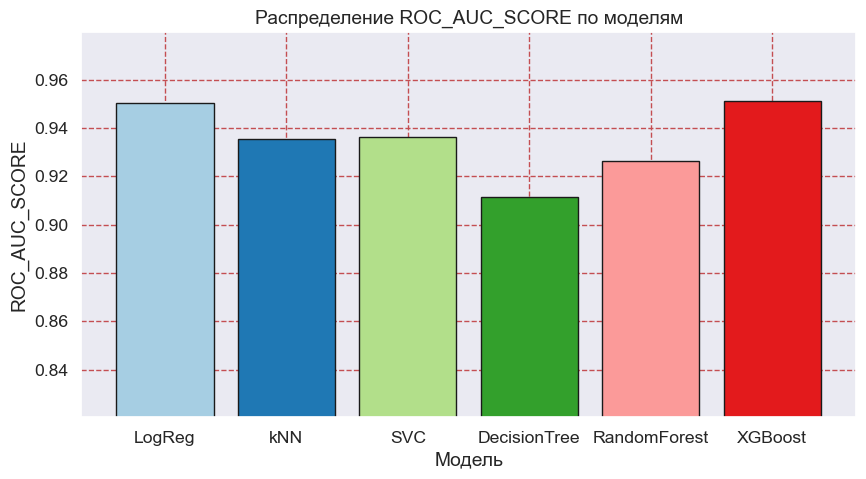

In [52]:
models_names = ['LogReg', 'kNN', 'SVC', 'DecisionTree', 'RandomForest', 'XGBoost']
ut.plot_metrics_hist(models_names, metrics)

In [53]:
best_metric = max(metrics)
best_model_name = models_names[metrics.index(best_metric)]
best_model = fitted_models[metrics.index(best_metric)]

print('Best Model:', best_model_name)
print('Best Metric, ROC_AUC_SCORE:', round(best_metric, 4))

Best Model: XGBoost
Best Metric, ROC_AUC_SCORE: 0.951


In [54]:
print(classification_report(y_true=y_test, y_pred=best_model.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       135
           1       0.97      0.93      0.95       161

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



- Amount: **удален**
- Time: **удален**
- Best Model: **XGBoost**
- Best Metric: **0.951**

- Amount: **присутствует**
- Time: **удален**
- Best Model: **LogReg**
- Best Metric: **0.9467**

- Amount: **удален**
- Time: **присутствует**
- Best Model: **LogReg**
- Best Metric: **0.9535**

- Amount: **присутствует**
- Time: **присутствует**
- Best Model: **LogReg**
- Best Metric: **0.9498**

#### Можно было бы еще попробовать подобрать параметры моделей с gridsearch или hyperopt, но не думаю, что именно для этой задачи это нужно) (я попробовал -> к сильному улучшению результата это не привело)

## Проверим модель на полном датасете:

In [55]:
sampled_df = df_full.sample(frac=0.05)


Честные 99.75 % of the dataset
Мошеннические: 0.25 % of the dataset


<Axes: xlabel='Class', ylabel='count'>

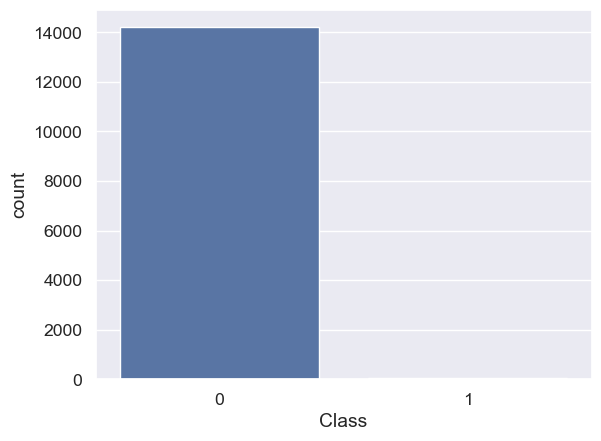

In [56]:
# Посмотрим, какой процент мошенничества в датасете
print('Честные', round(sampled_df['Class'].value_counts()[0]/len(sampled_df) * 100,2), '% of the dataset')
print('Мошеннические:', round(sampled_df['Class'].value_counts()[1]/len(sampled_df) * 100,2), '% of the dataset')
sns.countplot(sampled_df, x='Class' )

In [57]:
y_full_test = sampled_df['Class']
X_full_test = sampled_df.drop(columns='Class')

In [58]:
X_full_test.drop(columns='Amount', inplace=True)
X_full_test.drop(columns="Time", inplace=True)  # Удалим время


In [59]:
print('ROC_AUC:', roc_auc_score(y_true=y_full_test, y_score=best_model.predict(X_full_test.values)))

ROC_AUC: 0.9683260421380803


In [60]:
print(classification_report(y_true=y_full_test, y_pred=best_model.predict(X_full_test.values)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     14205
           1       0.06      0.97      0.12        35

    accuracy                           0.97     14240
   macro avg       0.53      0.97      0.55     14240
weighted avg       1.00      0.97      0.98     14240



## Интерпретация результатов:
- precision = TP / (TP + FP) -> он маленький для первого из-за того, что датасет несбалансированный.
- recall – показывает, сколько положительных прогнозов на самом деле оказались верными. Везде он высокий.
- f1 ля 1го класса низкий, но это из-за того, что датасет несбалансирован.

**Итог:**
roc_auc_score = 0.98

weighted f1-score = 0.98.

Это говорит, что качество модели достаточно хорошее. Модель хорошо разделяет мошеннические транзакции от обычных. Доработки модели не требуются.